# Online Shoppers Purchasing Intention Dataset 
https://doi.org/10.24432/C5F88Q
## Methodology Framework: CRISP-DM & AWS Well-Architected ML
### Framework Synergies
1. **Data Quality & Reliability**:
   - CRISP-DM: Data understanding and preparation
   - AWS: Reliability pillar for robust implementation

2. **Model Development**:
   - CRISP-DM: Modeling and evaluation phases
   - AWS: Performance efficiency and operational excellence

3. **Business Impact**:
   - CRISP-DM: Business understanding and deployment.
   - AWS: Cost optimization and security considerations.

---
### Sections:

 1. [Bussiness Understanding](#1bussiness-understanding).
 2. [Data Understanding](#2data-understanding). 
 3. [Data Preparation](#3data-preparation).
 4. [Modelling](#4-modeling). 
 5. [Evaluation](#5-evaluation). 
 6. Deployment.
---

### 1.Bussiness Understanding.


- The Data set hold user session data from an e-commerce website collected over a period of one year.
- The Session represent a unique user. 
- The goal is to 

### 2.Data Understanding.

#### 2.1 Dependecies.

In [ ]:
# Standard library imports
from typing import (
    Dict, 
    List, 
    Tuple, 
    Any
)

from dataclasses import dataclass
from dataclasses import field



# Data manipulation and analysis
import numpy as np
import pandas as pd
import joblib
import json
from scipy import stats as scipy_stats

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score, 
    davies_bouldin_score, 
    calinski_harabasz_score
)
from sklearn.cluster import AgglomerativeClustering



# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set up for plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Set a random seed for reproducibility
np.random.seed(92)

#### 2.2 Load the dataset.

In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('../data/raw/online_shoppers_intention.csv')
print(f"Data Shape: {df.shape}")

Data Shape: (12330, 18)


#### 2.3 Display the basic information of the dataset.

- Check for missing values.
- Display first and last rows.
- Show basic dataset information.

In [3]:
# Check for missing values
print("Missing values")
print(df.isnull().sum())

Missing values
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [4]:
df.head(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [5]:
df.tail(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12315,0,0.00,0,0.0,7,212.500000,0.000000,0.033333,0.000000,0.0,Nov,3,2,1,11,Returning_Visitor,True,False
12316,0,0.00,0,0.0,44,615.000000,0.013636,0.036364,0.000000,0.0,Dec,4,1,3,1,Returning_Visitor,False,False
12317,3,100.50,0,0.0,95,1453.640882,0.002105,0.012761,0.000000,0.0,Dec,2,2,3,2,New_Visitor,False,False
12318,0,0.00,0,0.0,6,279.000000,0.000000,0.033333,0.000000,0.0,Dec,1,2,3,10,Returning_Visitor,True,False
12319,0,0.00,0,0.0,21,1128.583333,0.000000,0.013043,3.685401,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.00,0,0.0,6,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,8,4,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330.0,NaN,NaN,NaN,2.315166,3.321784,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12330.0,NaN,NaN,NaN,80.818611,176.779107,0.0,0.0,7.5,93.25625,3398.75
Informational,12330.0,NaN,NaN,NaN,0.503569,1.270156,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12330.0,NaN,NaN,NaN,34.472398,140.749294,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12330.0,NaN,NaN,NaN,31.731468,44.475503,0.0,7.0,18.0,38.0,705.0
ProductRelated_Duration,12330.0,NaN,NaN,NaN,1194.74622,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223
BounceRates,12330.0,NaN,NaN,NaN,0.022191,0.048488,0.0,0.0,0.003112,0.016813,0.2
ExitRates,12330.0,NaN,NaN,NaN,0.043073,0.048597,0.0,0.014286,0.025156,0.05,0.2
PageValues,12330.0,NaN,NaN,NaN,5.889258,18.568437,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12330.0,NaN,NaN,NaN,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0


#### 2.4 Display unique values in the dataset.

In [8]:
print("\nUnique values in each column:")
print(df.nunique())

# Display duplicate rows if any
print("\nDuplicate values in rows:", df.duplicated().sum())


Unique values in each column:
Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Duplicate values in rows: 125


#### 2.5 Exploratory Data Analysis (EDA).

##### 2.5.1 Distribution of Numerical Features.


Numerical Features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


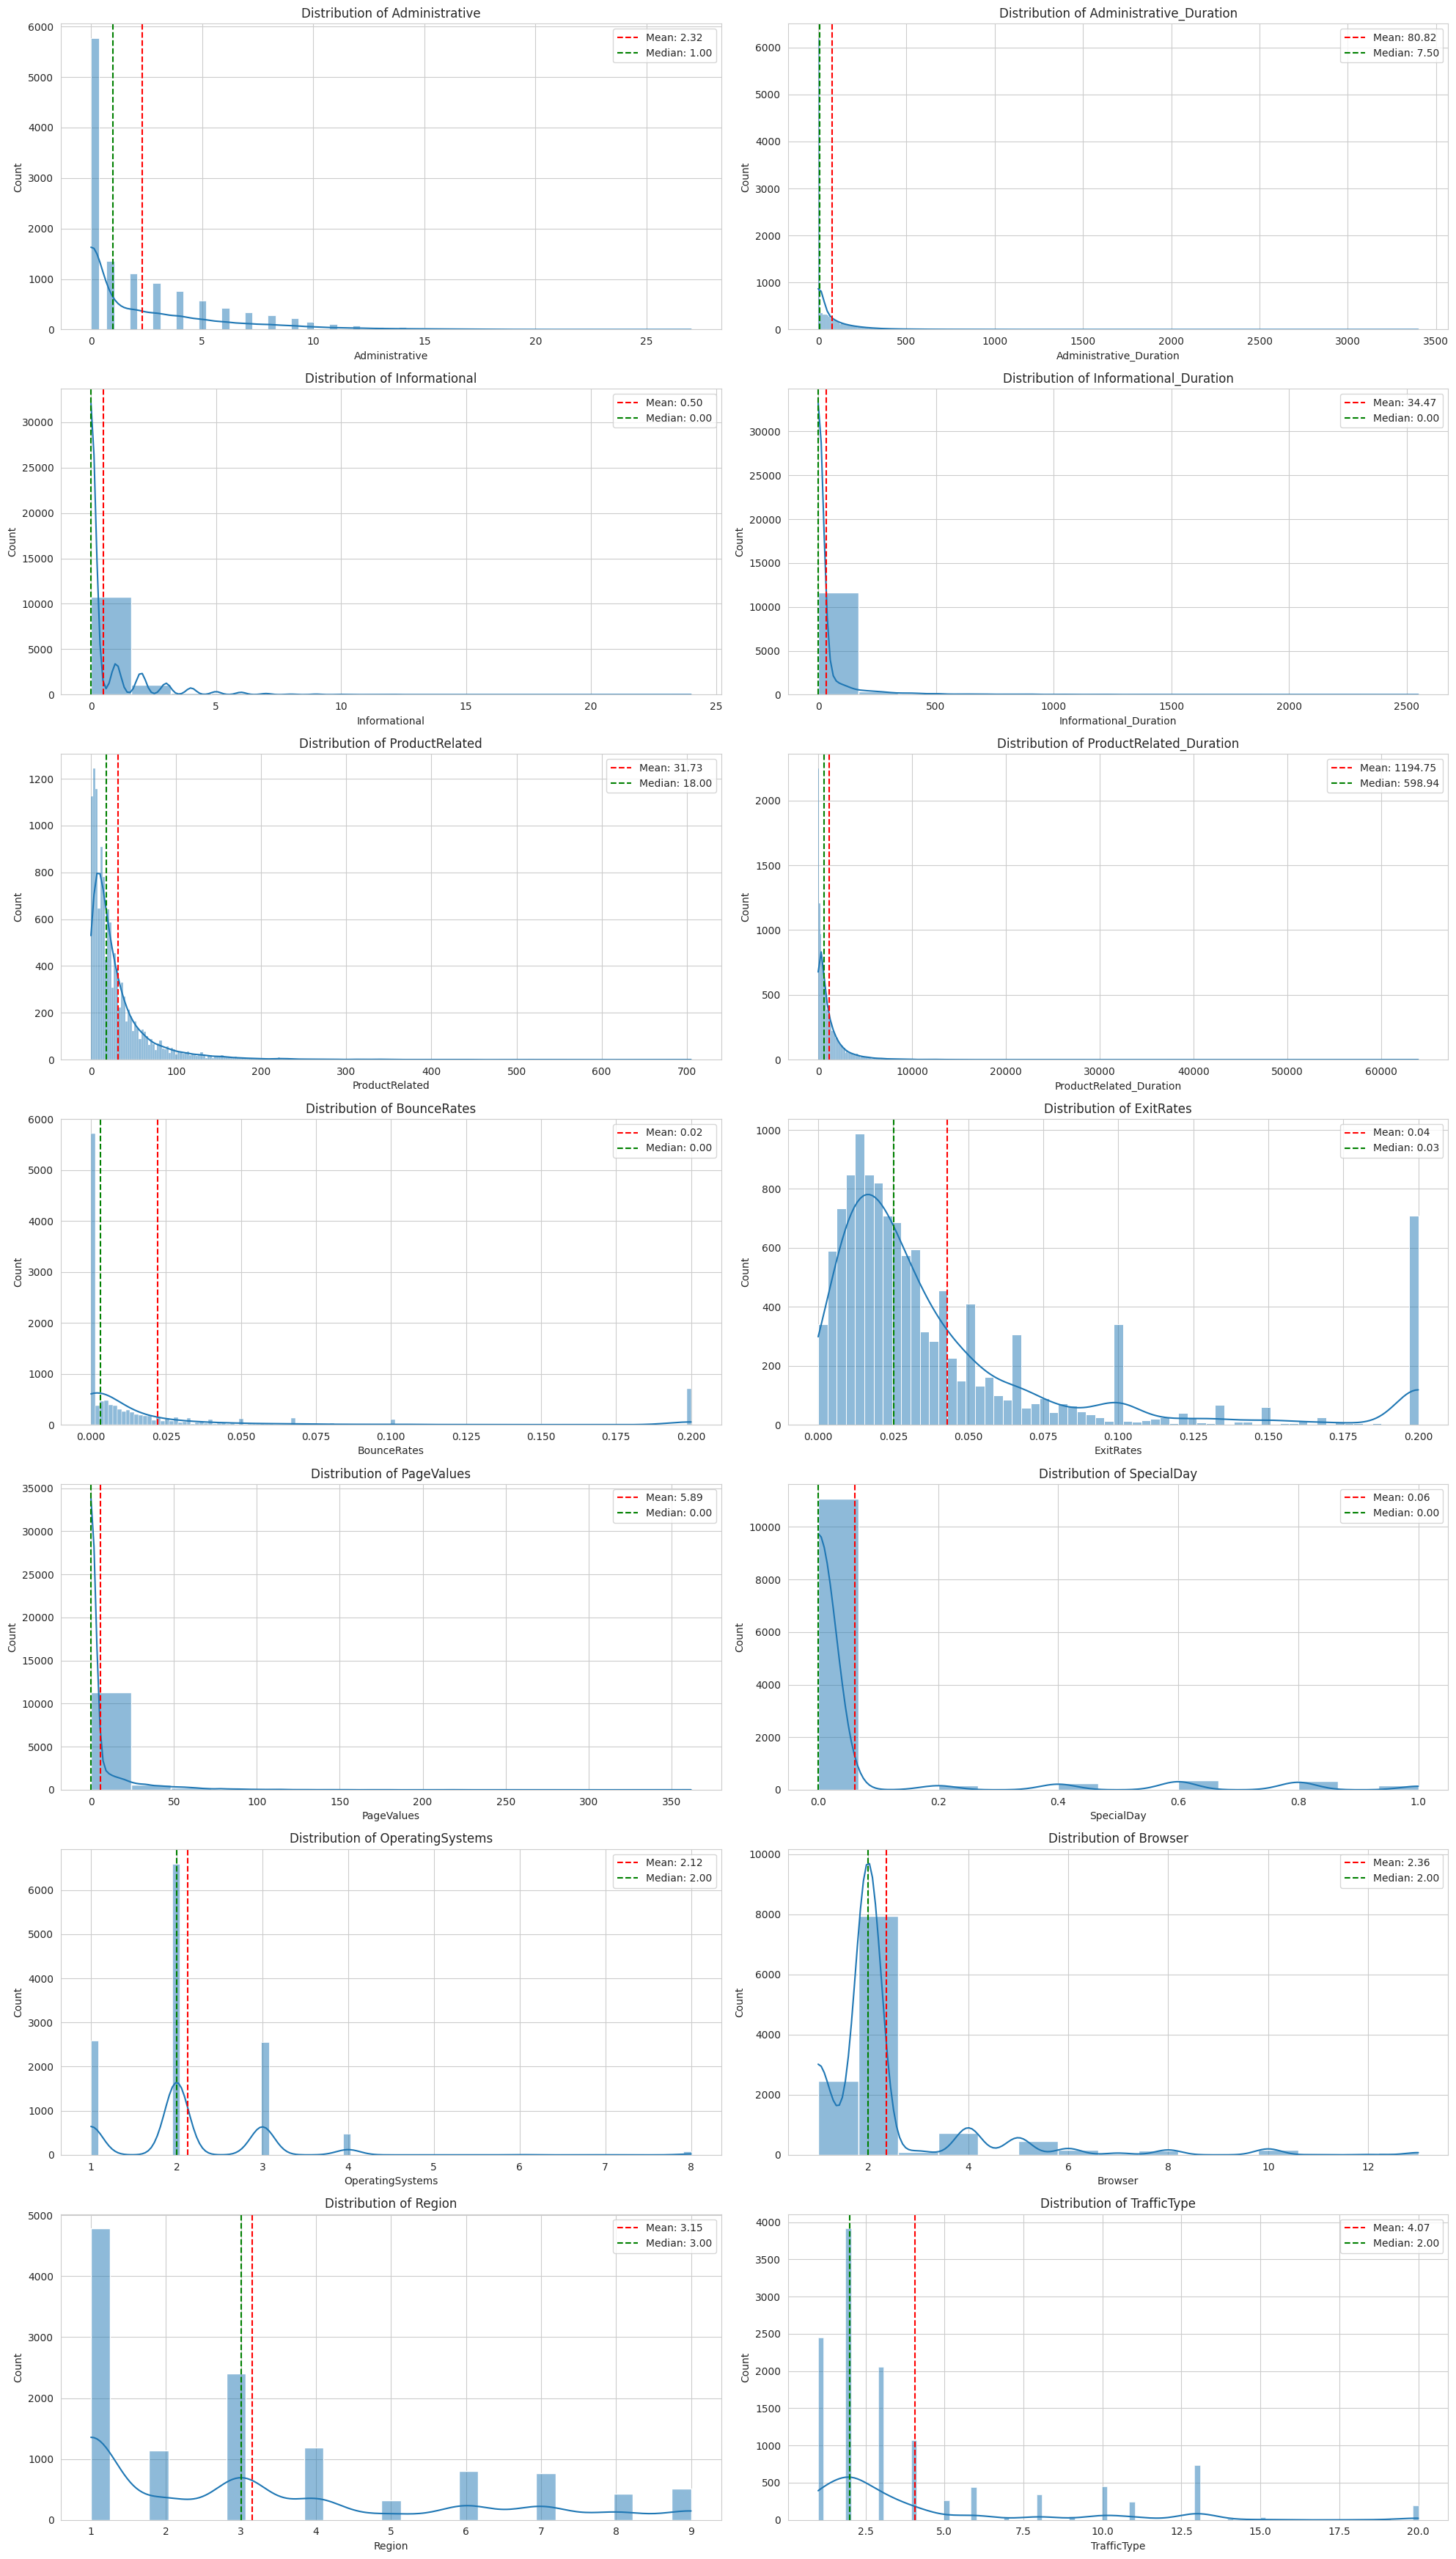


Numerical Features Summary Statistics:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25% 

In [9]:
def analyse_numerical_features(df: pd.DataFrame) -> None:
    """
    Analyse and visualize the numerical features.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    print("\nNumerical Features:", numerical_features.tolist())
    
    # Create distribution plots
    num_features = len(numerical_features)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
    axes = axes.flatten()
    
    for i, feature in enumerate(numerical_features):
        # The kde parameter is set to True to display the Kernel Density Estimation plot        
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        
        # Add descriptive statistics
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        axes[i].axvline(mean_val, color='r', linestyle='--', 
                       label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='g', linestyle='--', 
                       label=f'Median: {median_val:.2f}')
        axes[i].legend()
    
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_2/numerical_features_distribution.png')
    plt.show()
    plt.close()
    
    # Print summary statistics
    print("\nNumerical Features Summary Statistics:")
    print(df[numerical_features].describe())

# Analyze numerical features
analyse_numerical_features(df)

##### 2.5.2 Distribution of Categorical Features.


Categorical Features: ['Month', 'VisitorType', 'Weekend', 'Revenue']


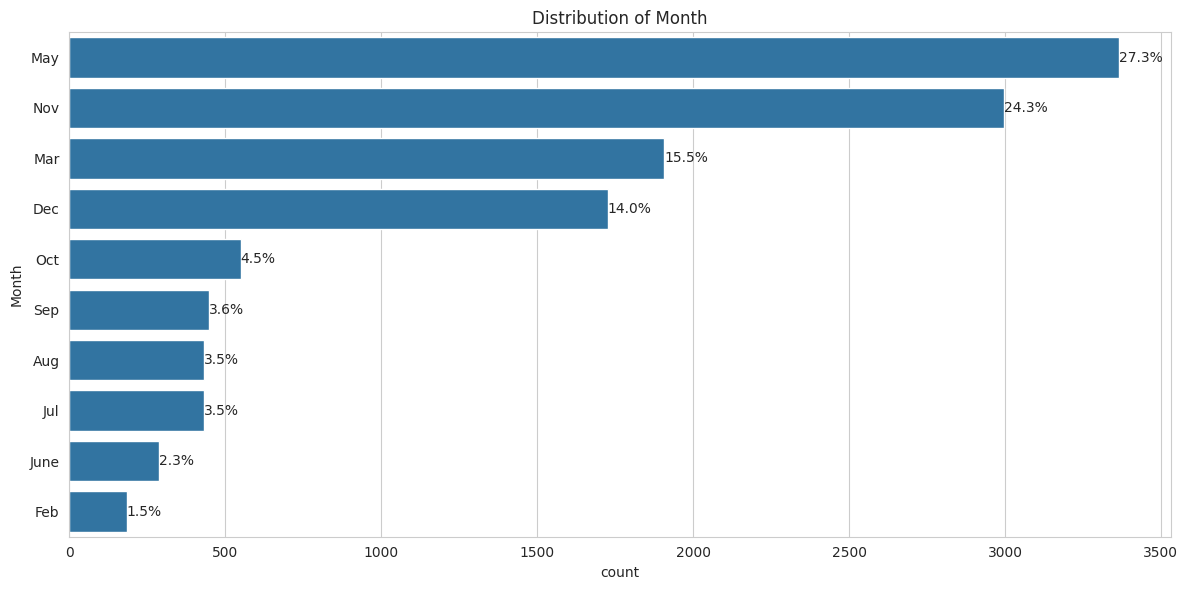


Distribution of Month:
Month
May     27.28%
Nov     24.31%
Mar     15.47%
Dec     14.01%
Oct      4.45%
Sep      3.63%
Aug      3.51%
Jul       3.5%
June     2.34%
Feb      1.49%
Name: proportion, dtype: object


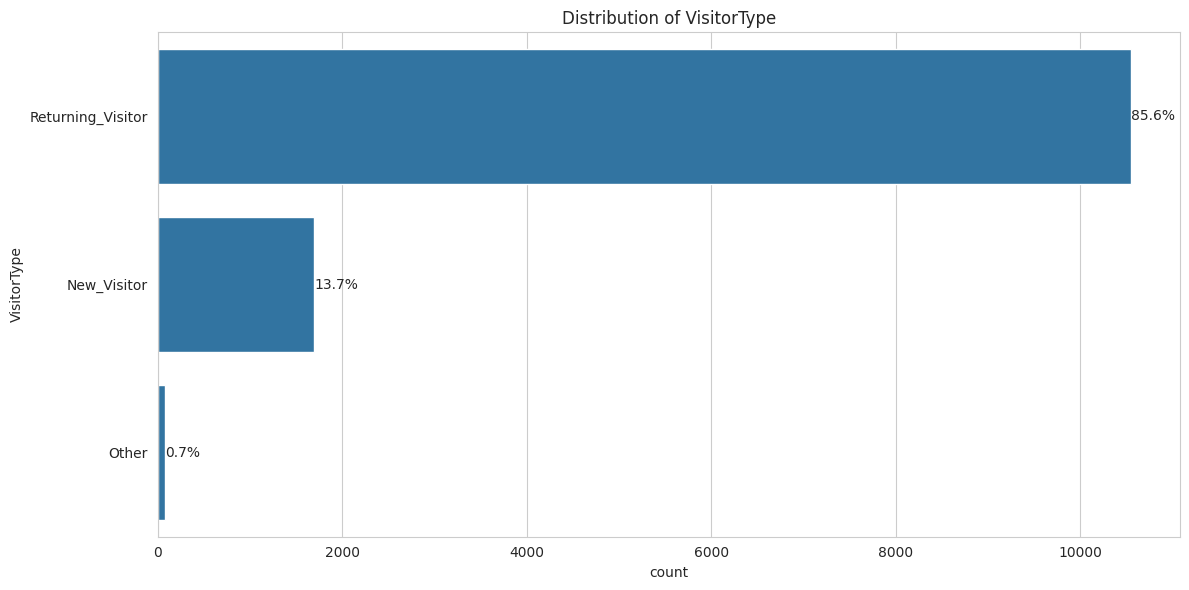


Distribution of VisitorType:
VisitorType
Returning_Visitor    85.57%
New_Visitor          13.74%
Other                 0.69%
Name: proportion, dtype: object


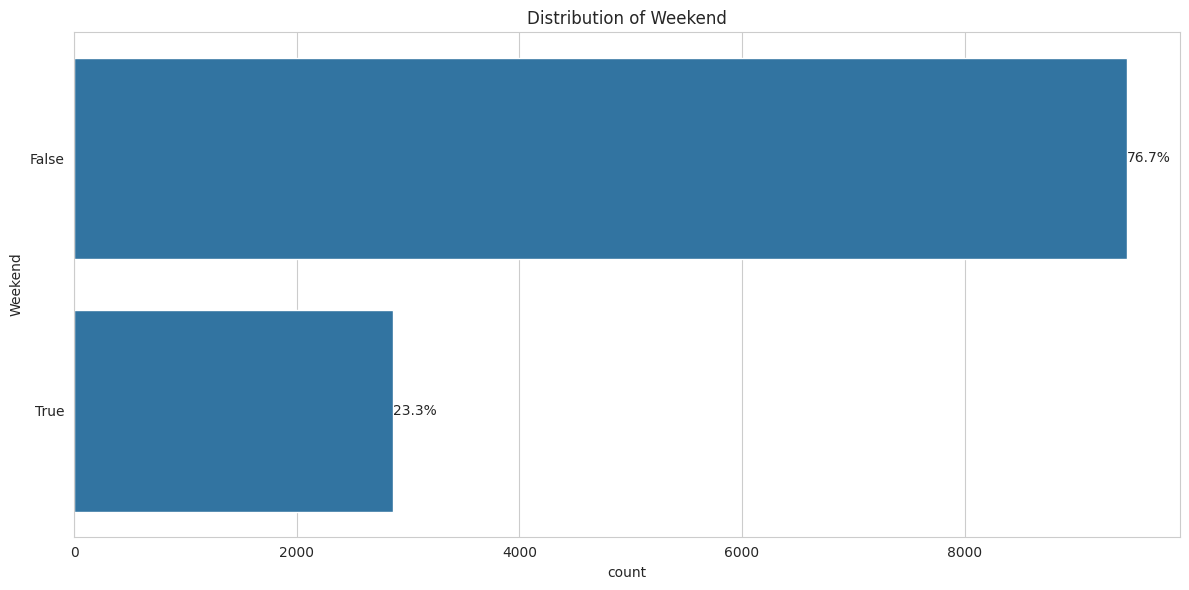


Distribution of Weekend:
Weekend
False    76.74%
True     23.26%
Name: proportion, dtype: object


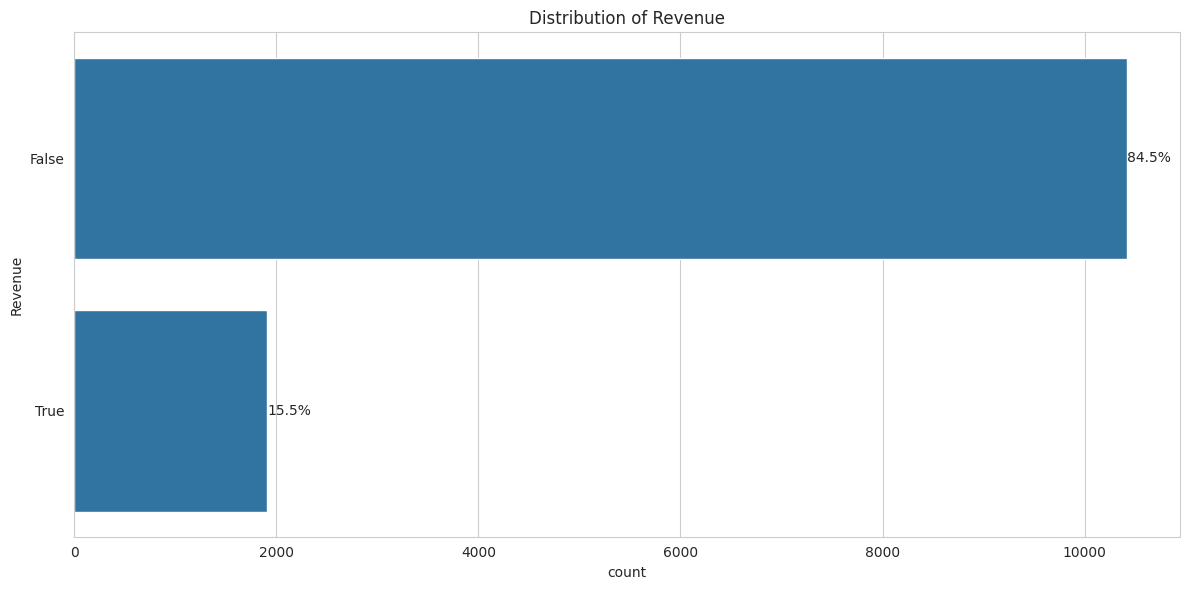


Distribution of Revenue:
Revenue
False    84.53%
True     15.47%
Name: proportion, dtype: object


In [10]:
def analyse_categorical_features(df: pd.DataFrame) -> None:
    """
    Analyse and visualize the categorical features.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Get categorical features
    categorical_features = df.select_dtypes(include=['object', 'bool']).columns
    print("\nCategorical Features:", categorical_features.tolist())
    
    # Create distribution plots
    for feature in categorical_features:
        plt.figure(figsize=(12, 6))
        
        # Create count plot
        sns.countplot(y=df[feature], order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        
        # Add percentage labels
        total = len(df)
        for p in plt.gca().patches:
            percentage = 100 * p.get_width()/total
            plt.gca().annotate(f'{percentage:.1f}%', 
                             (p.get_width(), p.get_y()+p.get_height()/2),
                             ha='left', va='center')
        
        plt.tight_layout()
        plt.savefig(f'../reports/figures/Task_2/categorical_{feature}_distribution.png')
        plt.show()
        plt.close()
        
        # Print value counts and percentages
        print(f"\nDistribution of {feature}:")
        print(df[feature].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

# Analyze categorical features
analyse_categorical_features(df)

##### 2.5.3 Correlation Analysis of Numerical Features.

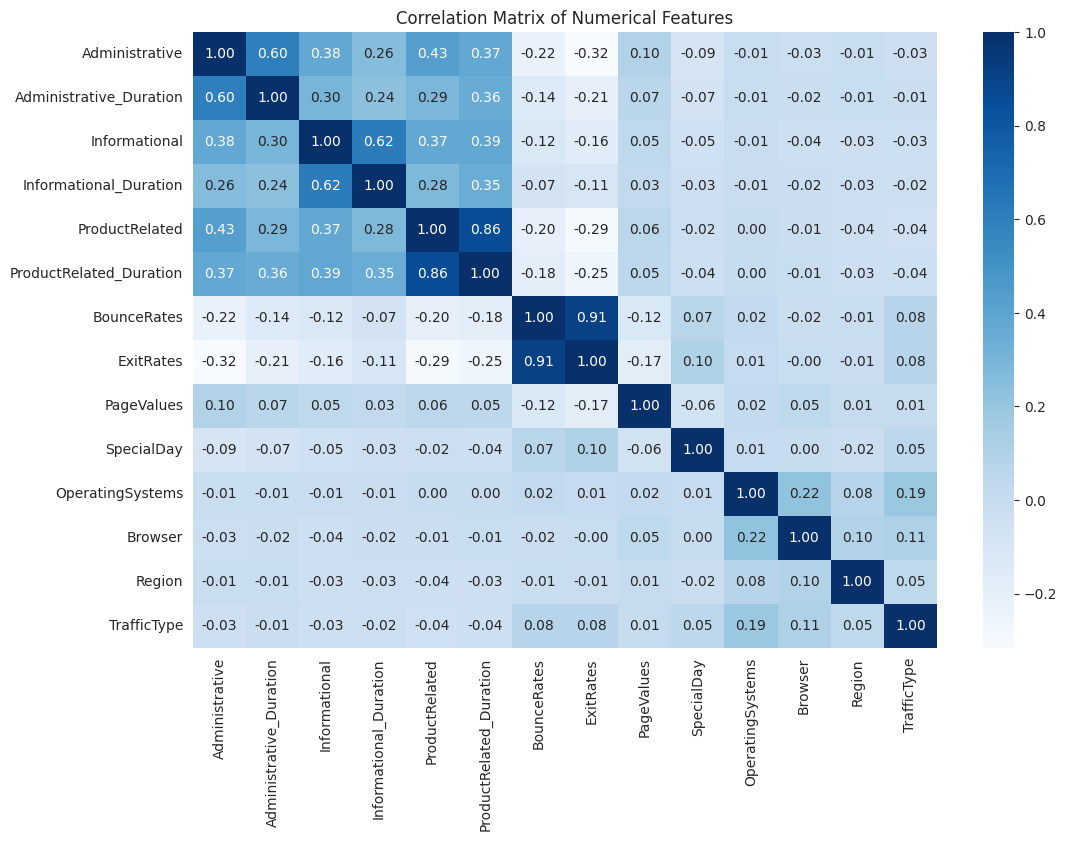


Strong Correlations (|correlation| > 0.5):
Administrative_Duration - Administrative: 0.60
Informational_Duration - Informational: 0.62
ProductRelated_Duration - ProductRelated: 0.86
ExitRates - BounceRates: 0.91


In [11]:
def analyse_correlations(df: pd.DataFrame) -> None:
    """
    Analyse and visualize correlations between numerical features.
    
    Parameters:
        df (pd.DataFrame): Original dataset
    """
    # Numerical correlations
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = df[numerical_features].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.savefig('../reports/figures/Task_2/correlation_matrix.png')
    plt.show()
    plt.close()
    
    # Print strong correlations (|correlation| > 0.5)
    print("\nStrong Correlations (|correlation| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                strong_corr.append(f"{correlation_matrix.columns[i]} - "
                                 f"{correlation_matrix.columns[j]}: "
                                 f"{correlation_matrix.iloc[i, j]:.2f}")
    for corr in strong_corr:
        print(corr)

# Analyze correlations
analyse_correlations(df)

### 3.Data Preparation.

#### 3.1 Feature Selection.

##### 3.1.1 Organize Features by Type.

In [12]:
df.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
@dataclass
class FeatureGroups:
    """
    Organise dataset features into logical groupings.
    
    Attributes:
        behavioral_features: Features related to user navigation behavior
        engagement_metrics: Features measuring user engagement
        temporal_features: Time-related features
        technical_features: System and device related features
        target_feature: Target variable (to be removed for clustering)
    """
    behavioral_features: List[str] = field(default_factory=lambda: [
        'Administrative', 'Administrative_Duration',
        'Informational', 'Informational_Duration',
        'ProductRelated', 'ProductRelated_Duration'
    ])
    
    engagement_metrics: List[str] = field(default_factory=lambda: [
        'BounceRates', 'ExitRates', 'PageValues'
    ])
    
    temporal_features: List[str] = field(default_factory=lambda: [
        'SpecialDay', 'Month', 'Weekend'
    ])
    
    technical_features: List[str] = field(default_factory=lambda: [
        'OperatingSystems', 'Browser', 'Region', 
        'TrafficType', 'VisitorType'
    ])
    
    target_feature: str = 'Revenue'
    
    def get_all_features(self) -> List[str]:
        """Get list of all features excluding target."""
        return (self.behavioral_features + 
                self.engagement_metrics + 
                self.temporal_features + 
                self.technical_features)
    
    def get_numerical_features(self) -> List[str]:
        """Get list of numerical features."""
        return (self.behavioral_features + 
                self.engagement_metrics + 
                ['SpecialDay'])
    
    def get_categorical_features(self) -> List[str]:
        """Get list of categorical features."""
        return (['Month', 'Weekend', 'VisitorType'] + 
                self.technical_features[:-1])  # Exclude VisitorType as it's counted above

# Initialise feature groups
feature_groups = FeatureGroups()

# Print feature organisation summary
print("Feature Organization Summary:")
for group_name, features in {
    'Behavioral Features': feature_groups.behavioral_features,
    'Engagement Metrics': feature_groups.engagement_metrics,
    'Temporal Features': feature_groups.temporal_features,
    'Technical Features': feature_groups.technical_features
}.items():
    print(f"\n{group_name}:")
    for feature in features:
        print(f"- {feature}")

Feature Organization Summary:

Behavioral Features:
- Administrative
- Administrative_Duration
- Informational
- Informational_Duration
- ProductRelated
- ProductRelated_Duration

Engagement Metrics:
- BounceRates
- ExitRates
- PageValues

Temporal Features:
- SpecialDay
- Month
- Weekend

Technical Features:
- OperatingSystems
- Browser
- Region
- TrafficType
- VisitorType


##### 3.1.2 Analyse Feature Relationships.

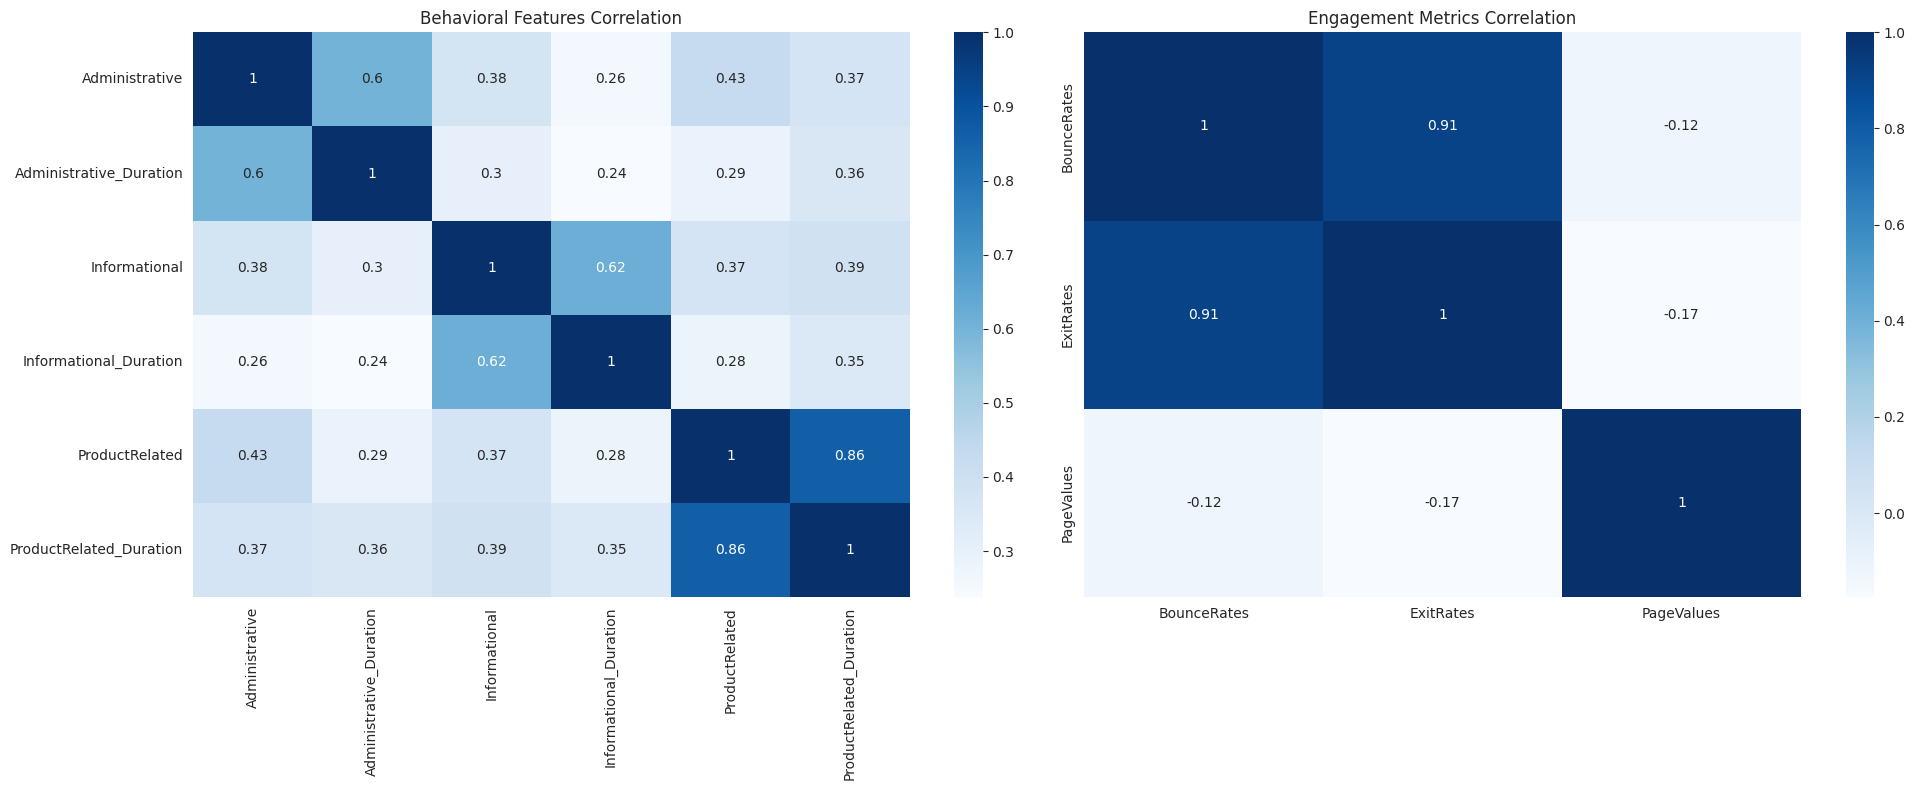

In [ ]:
def analyse_feature_relationships(df: pd.DataFrame, 
                               feature_groups: FeatureGroups) -> Dict[str, pd.DataFrame]:
    """
    Analyse relationships between features within and across groups.
    
    Args:
        df: Input DataFrame
        feature_groups: FeatureGroups dataclass instance
    
    Returns:
        Dictionary containing correlation matrices for different feature groups
    """
    correlation_analyses = {}
    
    # Analyse behavioral features relationships
    behavioral_corr = df[feature_groups.behavioral_features].corr()
    correlation_analyses['behavioral'] = behavioral_corr
    
    # Analse engagement metrics relationships
    engagement_corr = df[feature_groups.engagement_metrics].corr()
    correlation_analyses['engagement'] = engagement_corr
    
    # Plot correlation heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Behavioral features heatmap
    sns.heatmap(behavioral_corr, annot=True, cmap='Blues', ax=axes[0])
    axes[0].set_title('Behavioral Features Correlation')
    
    # Engagement metrics heatmap
    sns.heatmap(engagement_corr, annot=True, cmap='Blues', ax=axes[1])
    axes[1].set_title('Engagement Metrics Correlation')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_2/feature_correlations.png')
    plt.show()
    plt.close()
    
    return correlation_analyses

# Analyse feature relationships
correlation_analyses = analyse_feature_relationships(df, feature_groups)

##### 3.1.3 Statistical Summary by Feature Groups.

In [ ]:
def generate_feature_statistics(df: pd.DataFrame, 
                              feature_groups: FeatureGroups) -> Dict[str, pd.DataFrame]:
    """
    Generate statistical summaries for each feature group.
    
    Args:
        df: Input DataFrame
        feature_groups: FeatureGroups dataclass instance
    
    Returns:
        Dictionary containing statistical summaries for each feature group
    """
    statistics = {}
    
    # Analyse numerical features
    numerical_stats = df[feature_groups.get_numerical_features()].describe()
    statistics['numerical'] = numerical_stats
    
    # Analyse categorical features
    categorical_stats = {}
    for feature in feature_groups.get_categorical_features():
        value_counts = df[feature].value_counts()
        proportions = df[feature].value_counts(normalize=True)
        categorical_stats[feature] = pd.concat([value_counts, proportions], axis=1)
        categorical_stats[feature].columns = ['Count', 'Proportion']
    
    statistics['categorical'] = categorical_stats
    
    # Print summary
    print("Numerical Features Summary:")
    print(numerical_stats)
    
    print("\nCategorical Features Summary:")
    for feature, stats in categorical_stats.items():
        print(f"\n{feature}:")
        print(stats)
    
    return statistics

# Generate statistical summaries
feature_statistics = generate_feature_statistics(df, feature_groups)

Numerical Features Summary:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%             

#### 3.2 Feature Engineering.

##### 3.2.1 Create Engagement Features.

In [16]:
def create_duration_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create metrics based on duration and page visit patterns.
    
    Args:
        df: Input DataFrame
    Returns:
        DataFrame with new duration-based features
    """
    df_new = df.copy()
    
    # Total session metrics
    df_new['total_duration'] = (df_new['Administrative_Duration'] + 
                               df_new['Informational_Duration'] + 
                               df_new['ProductRelated_Duration'])
    
    df_new['total_pages'] = (df_new['Administrative'] + 
                            df_new['Informational'] + 
                            df_new['ProductRelated'])
    
    # Average time per page
    df_new['avg_time_per_page'] = df_new['total_duration'] / (df_new['total_pages'] + 1)
    
    # Page type ratios
    df_new['admin_ratio'] = df_new['Administrative'] / (df_new['total_pages'] + 1)
    df_new['info_ratio'] = df_new['Informational'] / (df_new['total_pages'] + 1)
    df_new['product_ratio'] = df_new['ProductRelated'] / (df_new['total_pages'] + 1)
    
    # Duration distribution
    total_duration = df_new['total_duration'] + 1  # Avoid division by zero
    df_new['admin_duration_ratio'] = df_new['Administrative_Duration'] / total_duration
    df_new['info_duration_ratio'] = df_new['Informational_Duration'] / total_duration
    df_new['product_duration_ratio'] = df_new['ProductRelated_Duration'] / total_duration
    
    print("New Duration Metrics Created:")
    print("\nSummary Statistics:")
    print(df_new[['total_duration', 'total_pages', 'avg_time_per_page']].describe())
    
    return df_new

# Create duration metrics
df_engineered = create_duration_metrics(df)

New Duration Metrics Created:

Summary Statistics:
       total_duration   total_pages  avg_time_per_page
count    12330.000000  12330.000000       12330.000000
mean      1310.037228     34.550203          34.790387
std       2037.801702     46.514053          33.850108
min          0.000000      0.000000           0.000000
25%        222.000000      8.000000          16.843155
50%        680.000000     20.000000          27.970982
75%       1626.908333     42.000000          43.118423
max      69921.647230    746.000000         940.666667


##### 3.2.2 Create Engagement Metrics.

In [17]:
def create_engagement_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create advanced engagement metrics combining multiple features.
    
    Args:
        df: Input DataFrame
    Returns:
        DataFrame with new engagement metrics
    """
    df_new = df.copy()
    
    # Bounce rate relative to exit rate
    df_new['bounce_exit_ratio'] = df_new['BounceRates'] / (df_new['ExitRates'] + 0.001)
    
    # Page value density
    df_new['value_per_page'] = df_new['PageValues'] / (df_new['total_pages'] + 1)
    
    # Engagement score (composite metric)
    df_new['engagement_score'] = (
        (1 - df_new['BounceRates']) * 
        df_new['total_duration'] * 
        (df_new['PageValues'] + 1)
    )
    
    # Log transform engagement score due to likely skewness
    df_new['engagement_score'] = np.log1p(df_new['engagement_score'])
    
    print("New Engagement Metrics Created:")
    print("\nSummary Statistics:")
    print(df_new[['bounce_exit_ratio', 'value_per_page', 'engagement_score']].describe())
    
    return df_new

# Create engagement metrics
df_engineered = create_engagement_metrics(df_engineered)

New Engagement Metrics Created:

Summary Statistics:
       bounce_exit_ratio  value_per_page  engagement_score
count       12330.000000    12330.000000      12330.000000
mean            0.282621        0.259086          6.713036
std             0.340708        1.206750          2.663600
min             0.000000        0.000000          0.000000
25%             0.000000        0.000000          5.424470
50%             0.163296        0.000000          6.688201
75%             0.492611        0.000000          8.213480
max             3.626220       33.848087         13.937632


##### 3.2.3 Create Temporal Features.

In [18]:
def create_temporal_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create temporal features including seasonality and special day interactions.
    
    Args:
        df: Input DataFrame
    Returns:
        DataFrame with new temporal features
    """
    df_new = df.copy()
    
    # Create cyclical month features
    month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
                 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
    
    df_new['month_num'] = df_new['Month'].map(month_map)
    
    # Convert month to cyclical features
    df_new['month_sin'] = np.sin(2 * np.pi * df_new['month_num']/12)
    df_new['month_cos'] = np.cos(2 * np.pi * df_new['month_num']/12)
    
    # Create special day interaction
    df_new['special_weekend'] = df_new['SpecialDay'] * df_new['Weekend']
    
    # Quarter of the year
    df_new['quarter'] = pd.qcut(df_new['month_num'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # Drop intermediate columns
    df_new = df_new.drop('month_num', axis=1)
    
    print("New Temporal Features Created:")
    print("\nSummary Statistics for Cyclical Features:")
    print(df_new[['month_sin', 'month_cos']].describe())
    
    return df_new

# Create temporal features
df_engineered = create_temporal_features(df_engineered)

New Temporal Features Created:

Summary Statistics for Cyclical Features:
          month_sin     month_cos
count  1.204200e+04  1.204200e+04
mean   6.102904e-02  9.848129e-02
std    6.368230e-01  7.623092e-01
min   -1.000000e+00 -8.660254e-01
25%   -5.000000e-01 -8.660254e-01
50%   -2.449294e-16  6.123234e-17
75%    5.000000e-01  8.660254e-01
max    1.000000e+00  1.000000e+00


##### 3.2.4 Validate Engineered Features.

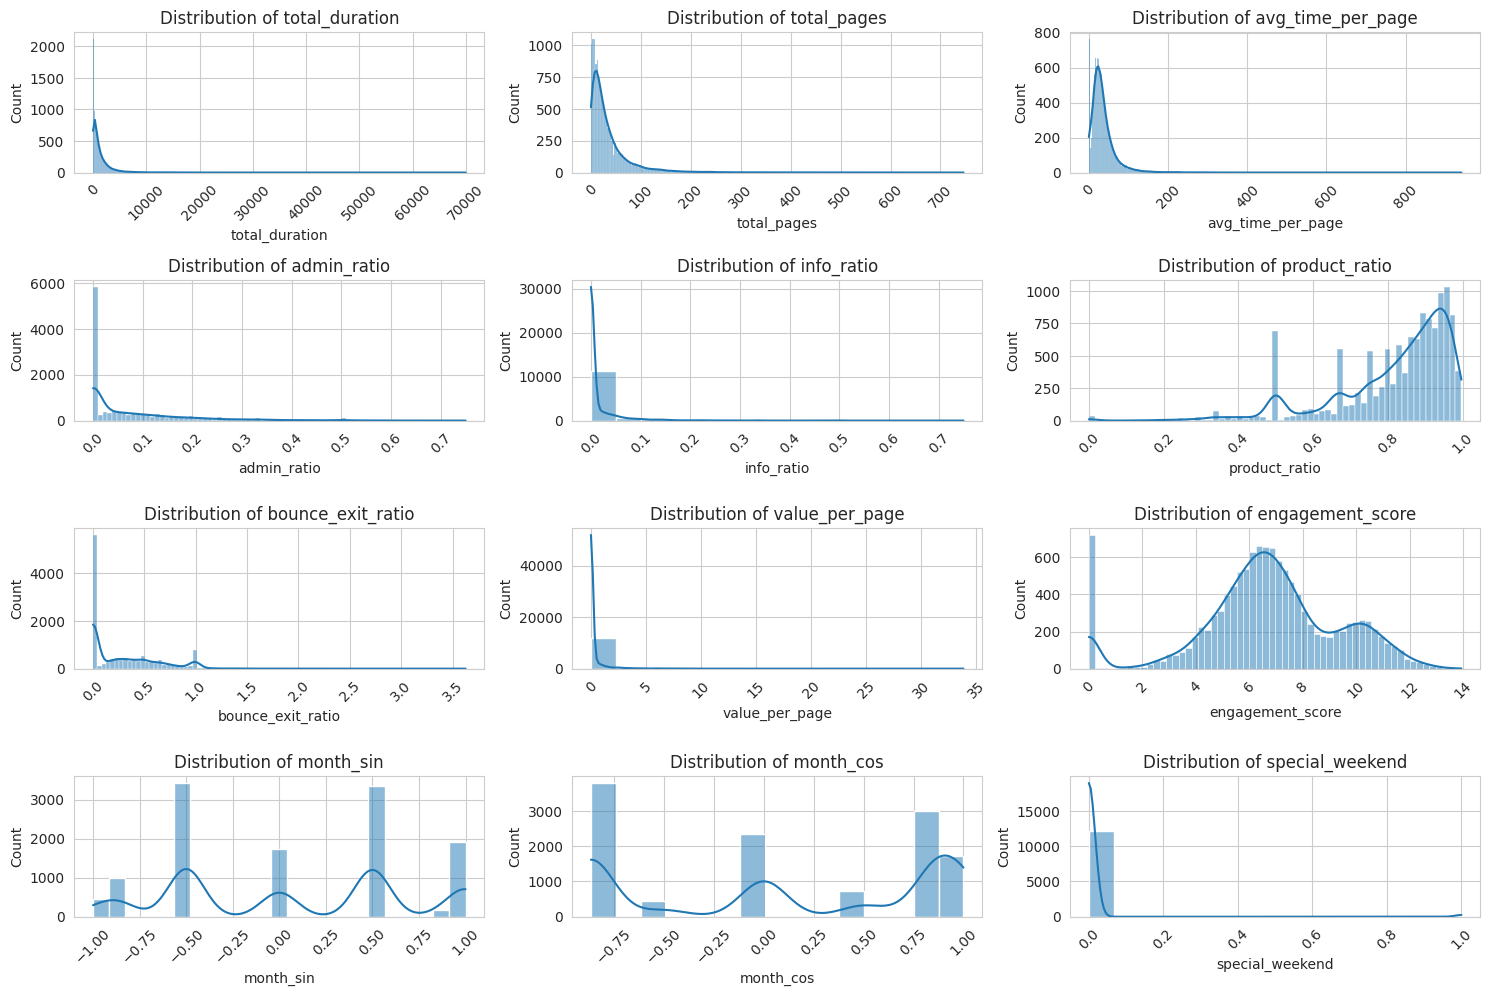

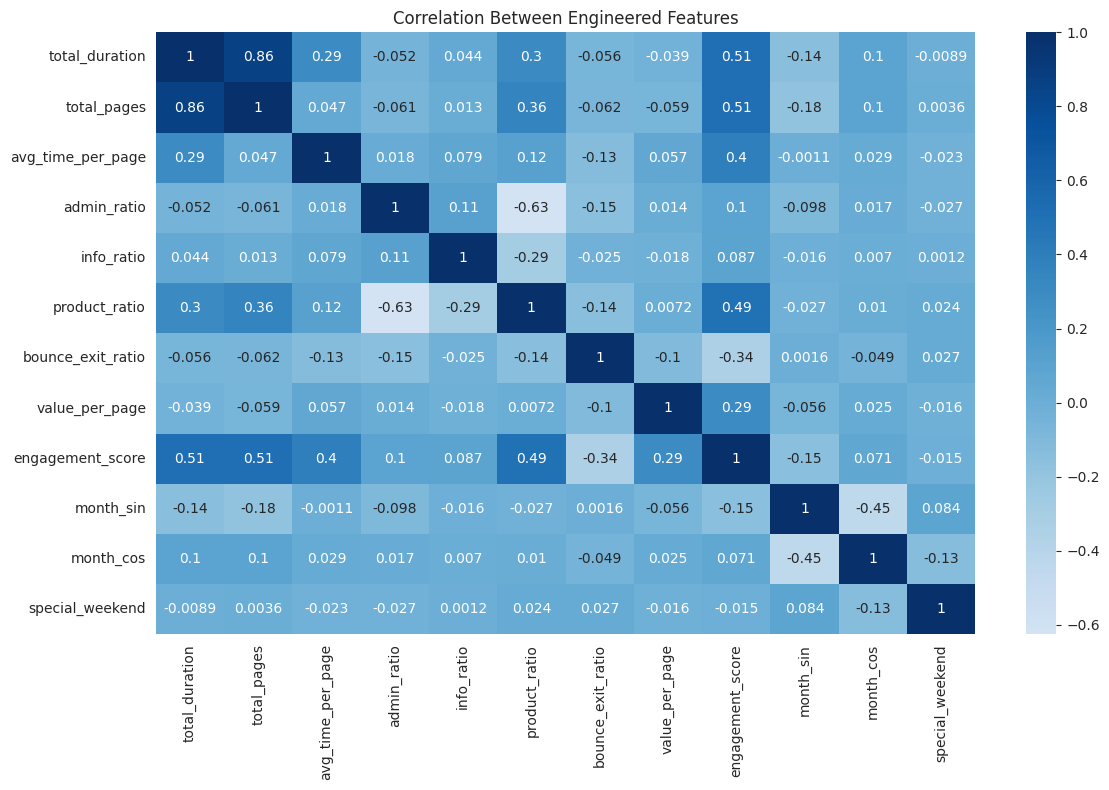


month_sin    288
month_cos    288
dtype: int64


In [19]:
def validate_engineered_features(df: pd.DataFrame) -> None:
    """
    Validate the quality and distributions of engineered features.
    
    Args:
        df: DataFrame with engineered features
    """
    # List of new features
    new_features = [
        'total_duration', 'total_pages', 'avg_time_per_page',
        'admin_ratio', 'info_ratio', 'product_ratio',
        'bounce_exit_ratio', 'value_per_page', 'engagement_score',
        'month_sin', 'month_cos', 'special_weekend'
    ]
    
    # Plot distributions of new features
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(new_features, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_2/engineered_features_distribution.png')
    plt.show()
    plt.close()
    
    # Check for correlations between new features
    correlation_matrix = df[new_features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
    plt.title('Correlation Between Engineered Features')
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_2/engineered_features_correlation.png')
    plt.show()
    plt.close()
    
    # Check for missing values
    missing_values = df[new_features].isnull().sum()
    if missing_values.any():
        print("\nWarning: Missing values detected:")
        print(missing_values[missing_values > 0])
    else:
        print("\nNo missing values in engineered features.")

# Validate engineered features
validate_engineered_features(df_engineered)

#### 3.3 Handle Outliers.

##### 3.3.1 Analyze Feature Distributions.

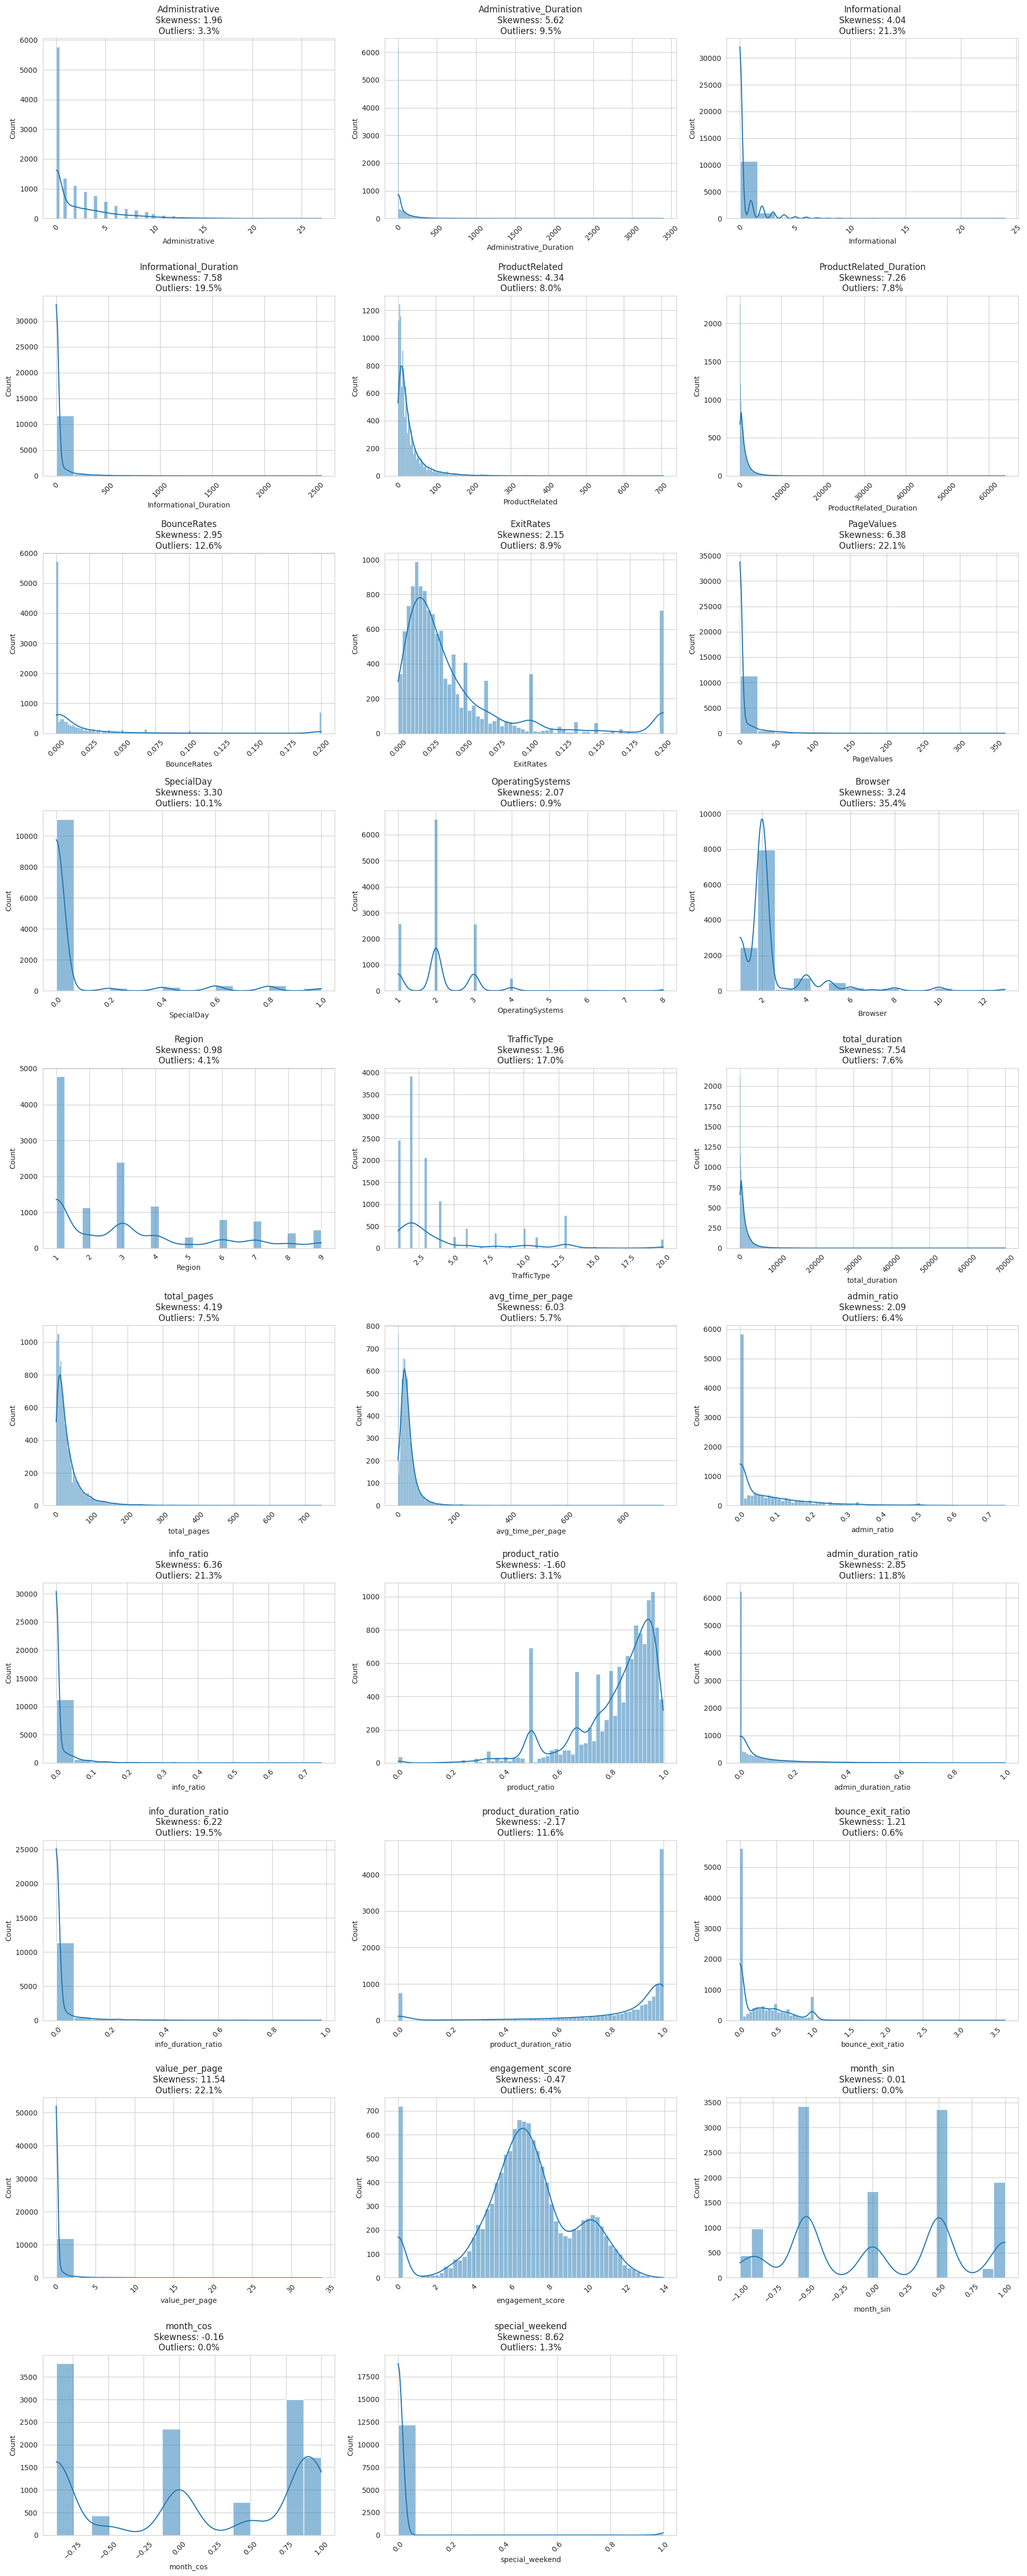


Feature Distribution Summary:

Administrative:
  Skewness: 1.96
  Outliers: 404 (3.3%)
  Range: [0.00, 27.00]

Administrative_Duration:
  Skewness: 5.62
  Outliers: 1172 (9.5%)
  Range: [0.00, 3398.75]

Informational:
  Skewness: 4.04
  Outliers: 2631 (21.3%)
  Range: [0.00, 24.00]

Informational_Duration:
  Skewness: 7.58
  Outliers: 2405 (19.5%)
  Range: [0.00, 2549.38]

ProductRelated:
  Skewness: 4.34
  Outliers: 987 (8.0%)
  Range: [0.00, 705.00]

ProductRelated_Duration:
  Skewness: 7.26
  Outliers: 961 (7.8%)
  Range: [0.00, 63973.52]

BounceRates:
  Skewness: 2.95
  Outliers: 1551 (12.6%)
  Range: [0.00, 0.20]

ExitRates:
  Skewness: 2.15
  Outliers: 1099 (8.9%)
  Range: [0.00, 0.20]

PageValues:
  Skewness: 6.38
  Outliers: 2730 (22.1%)
  Range: [0.00, 361.76]

SpecialDay:
  Skewness: 3.30
  Outliers: 1251 (10.1%)
  Range: [0.00, 1.00]

OperatingSystems:
  Skewness: 2.07
  Outliers: 111 (0.9%)
  Range: [1.00, 8.00]

Browser:
  Skewness: 3.24
  Outliers: 4369 (35.4%)
  Range: 

In [ ]:
def analyse_feature_distributions(df: pd.DataFrame, feature_groups: FeatureGroups) -> Dict[str, dict]:
    """
    Analyse distributions of numerical features to identify skewness and outliers.
    
    Args:
        df: Input DataFrame
        feature_groups: FeatureGroups dataclass instance
    Returns:
        Dictionary containing distribution statistics for each feature
    """
    distribution_stats = {}
    
    # Get only numerical features, excluding categorical ones
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Calculate distribution statistics
    for feature in numerical_features:
        stats = {
            'skewness': df[feature].skew(),
            'kurtosis': df[feature].kurtosis(),
            'iqr': df[feature].quantile(0.75) - df[feature].quantile(0.25),
            'mean': df[feature].mean(),
            'std': df[feature].std(),
            'min': df[feature].min(),
            'max': df[feature].max()
        }
        
        # Calculate outliers using IQR method
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[
            (df[feature] < Q1 - 1.5 * IQR) |
            (df[feature] > Q3 + 1.5 * IQR)
        ]
        stats['outliers_count'] = len(outliers)
        stats['outliers_percentage'] = (len(outliers) / len(df)) * 100
        
        distribution_stats[feature] = stats
    
    # Plot distributions
    n_features = len(numerical_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    plt.figure(figsize=(20, 5*n_rows))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[feature], kde=True)
        plt.title(f'{feature}\nSkewness: {distribution_stats[feature]["skewness"]:.2f}\n'
                 f'Outliers: {distribution_stats[feature]["outliers_percentage"]:.1f}%')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_2/feature_distributions.png')
    plt.show()
    plt.close()
    
    # Print summary
    print("\nFeature Distribution Summary:")
    for feature, stats in distribution_stats.items():
        print(f"\n{feature}:")
        print(f"  Skewness: {stats['skewness']:.2f}")
        print(f"  Outliers: {stats['outliers_count']} ({stats['outliers_percentage']:.1f}%)")
        print(f"  Range: [{stats['min']:.2f}, {stats['max']:.2f}]")
    
    return distribution_stats

# Analyse distributions
dist_stats = analyse_feature_distributions(df_engineered, feature_groups)

##### 3.3.2 Handle Outliers and Transform Features.

In [ ]:
def handle_outliers_and_transform(df: pd.DataFrame, 
                                dist_stats: Dict[str, dict],
                                skewness_threshold: float = 1.0) -> pd.DataFrame:
    """
    Handle outliers and transform skewed features in one pass.
    
    Args:
        df: Input DataFrame
        dist_stats: Distribution statistics
        skewness_threshold: Threshold for considering a feature skewed
    Returns:
        DataFrame with handled outliers and transformed features
    """
    df_processed = df.copy()
    summary = {}
    
    for feature, stats in dist_stats.items():
        original_stats = {
            'skewness': stats['skewness'],
            'range': f"[{stats['min']:.2f}, {stats['max']:.2f}]"
        }
        
        # Handle outliers first
        if stats['outliers_percentage'] > 5:  # If more than 5% outliers
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_processed[feature] = df_processed[feature].clip(lower=lower_bound, upper=upper_bound)
        
        # Then handle skewness
        if abs(stats['skewness']) > skewness_threshold:
            if df_processed[feature].min() >= 0:
                if df_processed[feature].min() == 0:
                    df_processed[feature] = np.log1p(df_processed[feature])
                    transformation = 'log1p'
                else:
                    df_processed[feature] = np.log(df_processed[feature])
                    transformation = 'log'
            else:
                # For features with negative values, use Yeo-Johnson
                
                df_processed[feature], lambda_param = scipy_stats.yeojohnson(df_processed[feature])
                transformation = f'yeo-johnson (lambda={lambda_param:.2f})'
        else:
            transformation = 'none'
        
        # Calculate new statistics
        new_stats = {
            'skewness': df_processed[feature].skew(),
            'range': f"[{df_processed[feature].min():.2f}, {df_processed[feature].max():.2f}]",
            'transformation': transformation
        }
        
        summary[feature] = {
            'original': original_stats,
            'processed': new_stats
        }
    
    # Print summary
    print("\nFeature Processing Summary:")
    for feature, stats in summary.items():
        print(f"\n{feature}:")
        print(f"  Original - Skewness: {stats['original']['skewness']:.2f}, Range: {stats['original']['range']}")
        print(f"  Processed - Skewness: {stats['processed']['skewness']:.2f}, Range: {stats['processed']['range']}")
        print(f"  Transformation: {stats['processed']['transformation']}")
    
    return df_processed, summary

# Process features
df_processed, processing_summary = handle_outliers_and_transform(df_engineered, dist_stats)


Feature Processing Summary:

Administrative:
  Original - Skewness: 1.96, Range: [0.00, 27.00]
  Processed - Skewness: 0.57, Range: [0.00, 3.33]
  Transformation: log1p

Administrative_Duration:
  Original - Skewness: 5.62, Range: [0.00, 3398.75]
  Processed - Skewness: 0.17, Range: [0.00, 5.46]
  Transformation: log1p

Informational:
  Original - Skewness: 4.04, Range: [0.00, 24.00]
  Processed - Skewness: 0.00, Range: [0.00, 0.00]
  Transformation: log1p

Informational_Duration:
  Original - Skewness: 7.58, Range: [0.00, 2549.38]
  Processed - Skewness: 0.00, Range: [0.00, 0.00]
  Transformation: log1p

ProductRelated:
  Original - Skewness: 4.34, Range: [0.00, 705.00]
  Processed - Skewness: -0.33, Range: [0.00, 4.45]
  Transformation: log1p

ProductRelated_Duration:
  Original - Skewness: 7.26, Range: [0.00, 63973.52]
  Processed - Skewness: -1.56, Range: [0.00, 8.13]
  Transformation: log1p

BounceRates:
  Original - Skewness: 2.95, Range: [0.00, 0.20]
  Processed - Skewness: 1.1

#### 3.4 Feature Encoding and Transformation.

##### 3.4.1 Encode Categorical Features.

In [22]:
def encode_categorical_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Encode categorical features with appropriate methods.
    
    Args:
        df: Input DataFrame
    Returns:
        DataFrame with encoded categorical features
    """
    df_encoded = df.copy()
    
    # Month: Cyclical encoding for seasonality
    month_order = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
                  'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
    
    # Create cyclical features for Month
    df_encoded['month_sin'] = df['Month'].map(month_order).apply(
        lambda x: np.sin(2 * np.pi * x/12))
    df_encoded['month_cos'] = df['Month'].map(month_order).apply(
        lambda x: np.cos(2 * np.pi * x/12))
    
    # Label encode VisitorType
    visitor_map = {'Returning_Visitor': 2, 'New_Visitor': 1, 'Other': 0}
    df_encoded['VisitorType'] = df['VisitorType'].map(visitor_map)
    
    # Convert Weekend boolean to int
    df_encoded['Weekend'] = df_encoded['Weekend'].astype(int)
    
    # Remove original Month column and Revenue (target)
    df_encoded = df_encoded.drop(['Month', 'Revenue'], axis=1)
    
    print("Categorical Encoding Summary:")
    print("\nMonth encoding (first 5 rows):")
    print(pd.DataFrame({
        'month_sin': df_encoded['month_sin'].head(),
        'month_cos': df_encoded['month_cos'].head()
    }))
    
    print("\nVisitorType encoding mapping:")
    print(visitor_map)
    
    print("\nWeekend encoding:", df_encoded['Weekend'].value_counts())
    
    return df_encoded

# Encode categorical features
df_encoded = encode_categorical_features(df_processed)

Categorical Encoding Summary:

Month encoding (first 5 rows):
   month_sin  month_cos
0   0.866025        0.5
1   0.866025        0.5
2   0.866025        0.5
3   0.866025        0.5
4   0.866025        0.5

VisitorType encoding mapping:
{'Returning_Visitor': 2, 'New_Visitor': 1, 'Other': 0}

Weekend encoding: Weekend
0    9462
1    2868
Name: count, dtype: int64


#### 3.5 Feature Scaling and Dimensionality Reduction.

##### 3.5.1 Scale Features.

In [23]:
def scale_features(df: pd.DataFrame) -> Tuple[pd.DataFrame, StandardScaler]:
    """
    Scale numerical features using StandardScaler.
    
    Args:
        df: Input DataFrame
    Returns:
        Tuple of (scaled DataFrame, fitted scaler)
    """
    # Get numerical columns only
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    print(f"\nScaling {len(numerical_columns)} numerical features:")
    for col in numerical_columns:
        print(f"- {col}")
    
    # Initialize scaler
    scaler = StandardScaler()
    
    # Create copy of dataframe
    df_scaled = df.copy()
    
    # Scale numerical features
    scaled_data = scaler.fit_transform(df[numerical_columns])
    df_scaled[numerical_columns] = scaled_data
    
    # Print scaling summary
    print("\nScaling Summary:")
    for col in numerical_columns:
        print(f"\n{col}:")
        print(f"  Original - Mean: {df[col].mean():.3f}, Std: {df[col].std():.3f}")
        print(f"  Scaled   - Mean: {df_scaled[col].mean():.3f}, Std: {df_scaled[col].std():.3f}")
    
    return df_scaled, scaler

# Scale features
df_scaled, scaler = scale_features(df_encoded)


Scaling 31 numerical features:
- Administrative
- Administrative_Duration
- Informational
- Informational_Duration
- ProductRelated
- ProductRelated_Duration
- BounceRates
- ExitRates
- PageValues
- SpecialDay
- OperatingSystems
- Browser
- Region
- TrafficType
- VisitorType
- Weekend
- total_duration
- total_pages
- avg_time_per_page
- admin_ratio
- info_ratio
- product_ratio
- admin_duration_ratio
- info_duration_ratio
- product_duration_ratio
- bounce_exit_ratio
- value_per_page
- engagement_score
- month_sin
- month_cos
- special_weekend

Scaling Summary:

Administrative:
  Original - Mean: 0.797, Std: 0.863
  Scaled   - Mean: -0.000, Std: 1.000

Administrative_Duration:
  Original - Mean: 2.252, Std: 2.278
  Scaled   - Mean: -0.000, Std: 1.000

Informational:
  Original - Mean: 0.000, Std: 0.000
  Scaled   - Mean: 0.000, Std: 0.000

Informational_Duration:
  Original - Mean: 0.000, Std: 0.000
  Scaled   - Mean: 0.000, Std: 0.000

ProductRelated:
  Original - Mean: 2.849, Std: 1.0

##### 3.5.2 Apply PCA.

In [24]:
def validate_and_prepare_numerical_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Validate numerical data and handle any NaN values before PCA.
    
    Args:
        df: Input DataFrame
    Returns:
        DataFrame with validated numerical features
    """
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Check for NaN values
    nan_check = df[numerical_columns].isna().sum()
    print("\nChecking for NaN values:")
    if nan_check.any():
        print("Found NaN values in:")
        for col in nan_check[nan_check > 0].index:
            print(f"- {col}: {nan_check[col]} NaN values")
            
        # Handle NaN values (using mean imputation as a simple strategy)
        print("\nHandling NaN values with mean imputation...")
        df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    else:
        print("No NaN values found in numerical features.")
    
    # Additional validation
    print("\nNumerical features shape:", df[numerical_columns].shape)
    print("Numerical features summary:")
    print(df[numerical_columns].describe().round(3))
    
    return df[numerical_columns]

In [ ]:
def apply_pca(df: pd.DataFrame, 
              n_components: int = 6,
              random_state: int = 92) -> Tuple[pd.DataFrame, PCA, pd.DataFrame]:
    """
    Apply PCA for dimensionality reduction on numerical features.
    
    Args:
        df: Input DataFrame
        n_components: Number of PCA components
        random_state: Random state for reproducibility
    Returns:
        Tuple of (PCA transformed DataFrame, PCA model, Feature importance DataFrame)
    """
    # Validate and prepare numerical data
    data_for_pca = validate_and_prepare_numerical_data(df)
    
    # Apply PCA
    pca = PCA(n_components=n_components, random_state=random_state)
    pca_result = pca.fit_transform(data_for_pca)
    
    # Create DataFrame with PCA components
    df_pca = pd.DataFrame(
        pca_result,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # Print variance explained
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    print("\nPCA Variance Explanation:")
    for i, (var, cum_var) in enumerate(zip(pca.explained_variance_ratio_, cumulative_variance)):
        print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%) - Cumulative: {cum_var:.3f} ({cum_var*100:.1f}%)")
    
    # Create feature importance DataFrame
    feature_importance = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=data_for_pca.columns
    )
    
    print("\nTop 3 features for each component:")
    for i in range(n_components):
        loadings = pd.Series(
            pca.components_[i],
            index=data_for_pca.columns
        ).abs().sort_values(ascending=False)
        print(f"\nPC{i+1}:")
        print(loadings.head(3))
    
    return df_pca, pca, feature_importance

# Apply PCA with validation
df_pca, pca_model, feature_importance = apply_pca(df_scaled)


Checking for NaN values:
Found NaN values in:
- month_sin: 288 NaN values
- month_cos: 288 NaN values

Handling NaN values with mean imputation...

Numerical features shape: (12330, 31)
Numerical features summary:
       Administrative  Administrative_Duration  Informational  \
count       12330.000                12330.000        12330.0   
mean           -0.000                   -0.000            0.0   
std             1.000                    1.000            0.0   
min            -0.924                   -0.989            0.0   
25%            -0.924                   -0.989            0.0   
50%            -0.120                   -0.049            0.0   
75%             0.942                    1.007            0.0   
max             2.938                    1.407            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                 12330.0       12330.000                12330.000   
mean                      0.0           0.000      

#### 3.6 Save Processed Data and Models.

In [26]:
def save_processed_data(df_pca: pd.DataFrame, 
                       pca_model: PCA,
                       scaler: StandardScaler,
                       feature_importance: pd.DataFrame,
                       base_path: str = '../data/processed/Task_2_processed/') -> None:
    """
    Save processed data and preprocessing objects.
    
    Args:
        df_pca: DataFrame with PCA components
        pca_model: Fitted PCA model
        scaler: Fitted StandardScaler
        feature_importance: DataFrame with feature importance for PCA components
        base_path: Base path for saving files
    """
    # Save PCA transformed data
    df_pca.to_csv(f'{base_path}pca_features.csv', index=False)
    
    # Save models
    joblib.dump(pca_model, f'{base_path}pca_model.joblib')
    joblib.dump(scaler, f'{base_path}scaler_model.joblib')
    
    # Save feature importance
    feature_importance.to_csv(f'{base_path}feature_importance.csv')
    
    # Save preprocessing information
    preprocessing_info = {
        'n_components': pca_model.n_components_,
        'explained_variance_ratio': pca_model.explained_variance_ratio_.tolist(),
        'cumulative_variance': np.cumsum(pca_model.explained_variance_ratio_).tolist(),
        'feature_names': feature_importance.index.tolist(),
        'pca_feature_names': df_pca.columns.tolist()
    }
    
    with open(f'{base_path}preprocessing_info.json', 'w') as f:
        json.dump(preprocessing_info, f, indent=4)
    
    print("\nSaved preprocessing artifacts:")
    print(f"- PCA features: {base_path}pca_features.csv")
    print(f"- PCA model: {base_path}pca_model.joblib")
    print(f"- Scaler model: {base_path}scaler_model.joblib")
    print(f"- Feature importance: {base_path}feature_importance.csv")
    print(f"- Preprocessing info: {base_path}preprocessing_info.json")

# Save all preprocessing artifacts
save_processed_data(df_pca, pca_model, scaler, feature_importance)


Saved preprocessing artifacts:
- PCA features: ../data/processed/Task_2_processed/pca_features.csv
- PCA model: ../data/processed/Task_2_processed/pca_model.joblib
- Scaler model: ../data/processed/Task_2_processed/scaler_model.joblib
- Feature importance: ../data/processed/Task_2_processed/feature_importance.csv
- Preprocessing info: ../data/processed/Task_2_processed/preprocessing_info.json


### 4. Modeling.

#### 4.1 Load Preprocessed Data.

In [27]:
try:
    X_pca # type: ignore
except NameError:
    # Load preprocessed data
    X_pca = pd.read_csv('../data/processed/Task_2_processed/pca_features.csv').values
    
    # Load preprocessing info
    with open('../data/processed/Task_2_processed/preprocessing_info.json', 'r') as f:
        preprocess_info = json.load(f)

#### 4.2 Baseline Model (K-means).

In [ ]:
# Train K-means
def train_kmeans(X: np.ndarray, n_clusters: int = 3) -> Tuple[KMeans, np.ndarray, Dict[str, float]]:
    """Train and evaluate K-means clustering."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=92)
    labels = kmeans.fit_predict(X)
    
    # Calculate metrics
    metrics = {
        'silhouette': silhouette_score(X, labels),
        'calinski_harabasz': calinski_harabasz_score(X, labels),
        'davies_bouldin': davies_bouldin_score(X, labels)
    }
    
    print("\nK-means Clustering Results:")
    print(f"Number of clusters: {n_clusters}")
    for name, value in metrics.items():
        print(f"{name}: {value:.3f}")
    
    return kmeans, labels, metrics

# Train K-means model
kmeans_model, kmeans_labels, kmeans_metrics = train_kmeans(X_pca)


K-means Clustering Results:
Number of clusters: 3
silhouette: 0.268
calinski_harabasz: 4994.579
davies_bouldin: 1.307


#### 4.3 Hierarchical Clustering.

In [29]:
def train_hierarchical_clustering(X: np.ndarray, 
                                n_clusters_range: range = range(2, 7),
                                linkage: str = 'ward') -> Tuple[AgglomerativeClustering, np.ndarray, Dict]:
    """Train and evaluate hierarchical clustering model."""
    print(f"\nTraining Hierarchical Clustering:")
    
    best_model = None
    best_labels = None
    best_score = -np.inf
    best_n_clusters = None
    best_metrics = None
    
    for n_clusters in n_clusters_range:
        print(f"\nTesting {n_clusters} clusters:")
        
        # Train model
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = model.fit_predict(X)
        
        # Calculate metrics
        metrics = {
            'silhouette': silhouette_score(X, labels),
            'calinski_harabasz': calinski_harabasz_score(X, labels),
            'davies_bouldin': davies_bouldin_score(X, labels)
        }
        
        print(f"Metrics for {n_clusters} clusters:")
        for name, value in metrics.items():
            print(f"{name}: {value:.3f}")
        
        # Update best model if better
        if metrics['silhouette'] > best_score:
            best_score = metrics['silhouette']
            best_model = model
            best_labels = labels
            best_n_clusters = n_clusters
            best_metrics = metrics
    
    print(f"\nBest configuration:")
    print(f"Number of clusters: {best_n_clusters}")
    print(f"Silhouette score: {best_score:.3f}")
    
    return best_model, best_labels, best_metrics

# Run hierarchical clustering
hierarchical_model, hierarchical_labels, hierarchical_metrics = train_hierarchical_clustering(X_pca)


Training Hierarchical Clustering:

Testing 2 clusters:
Metrics for 2 clusters:
silhouette: 0.232
calinski_harabasz: 3763.993
davies_bouldin: 1.651

Testing 3 clusters:
Metrics for 3 clusters:
silhouette: 0.259
calinski_harabasz: 4543.354
davies_bouldin: 1.277

Testing 4 clusters:
Metrics for 4 clusters:
silhouette: 0.231
calinski_harabasz: 4096.478
davies_bouldin: 1.284

Testing 5 clusters:
Metrics for 5 clusters:
silhouette: 0.192
calinski_harabasz: 3789.103
davies_bouldin: 1.506

Testing 6 clusters:
Metrics for 6 clusters:
silhouette: 0.198
calinski_harabasz: 3609.794
davies_bouldin: 1.315

Best configuration:
Number of clusters: 3
Silhouette score: 0.259


#### 4.4 Compare Results.

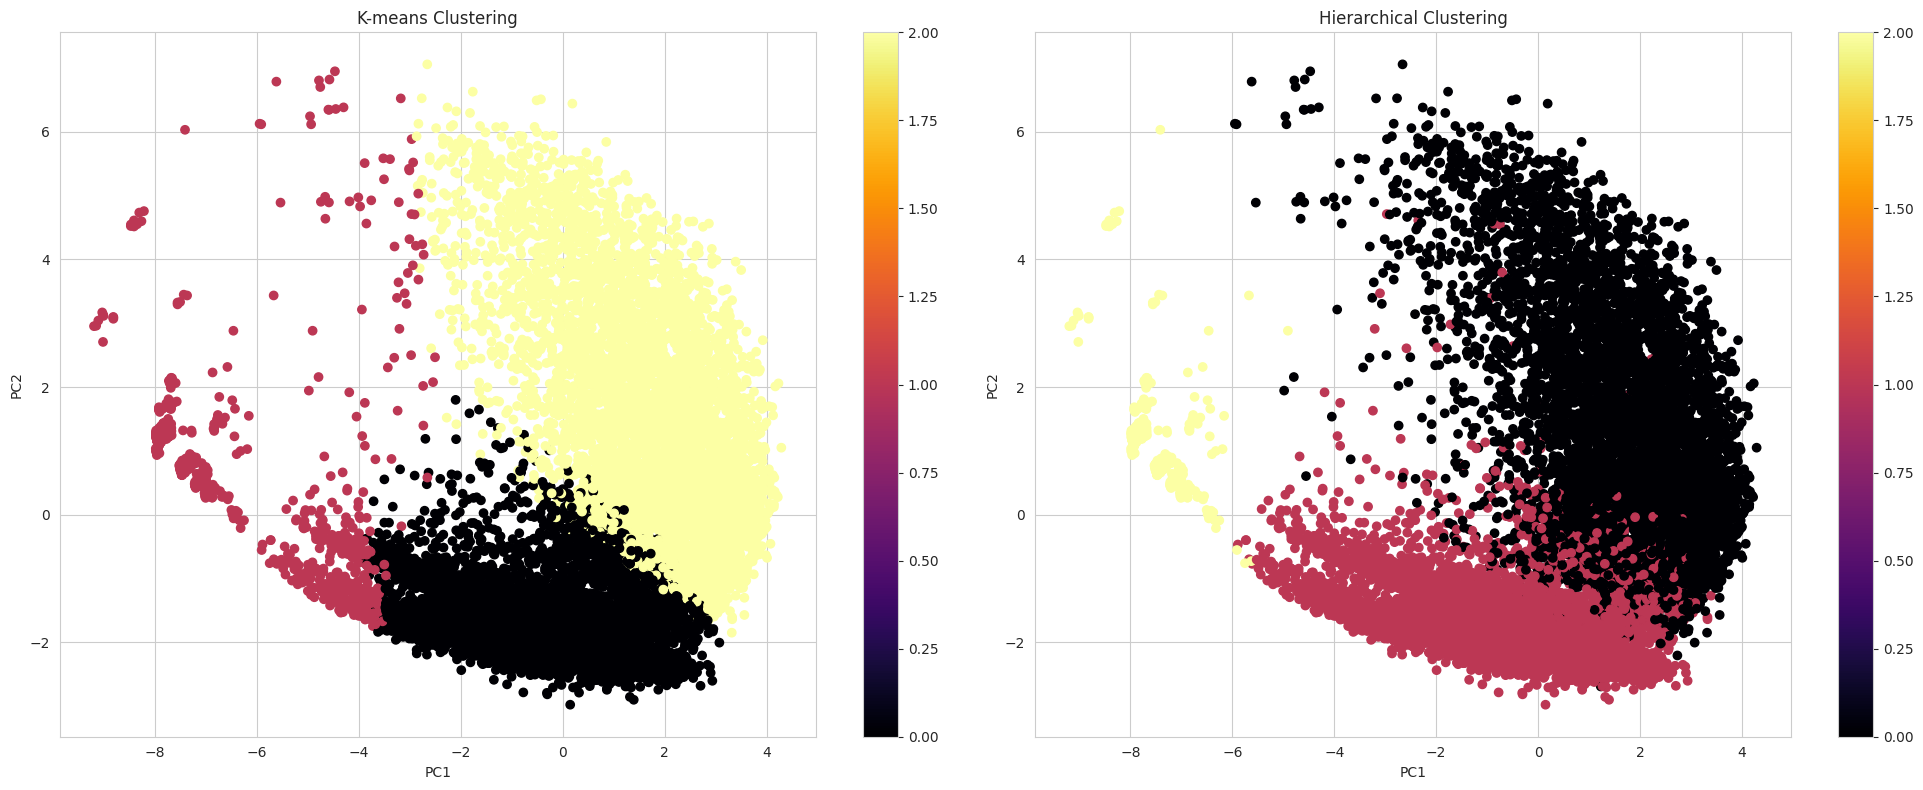


Clustering Algorithm Comparison:

K-means metrics:
silhouette: 0.268
calinski_harabasz: 4994.579
davies_bouldin: 1.307

Hierarchical metrics:
silhouette: 0.259
calinski_harabasz: 4543.354
davies_bouldin: 1.277


In [30]:
def visualize_clustering_results(X: np.ndarray, 
                               kmeans_labels: np.ndarray, 
                               hierarchical_labels: np.ndarray,
                               feature_names: List[str]) -> None:
    """Visualize and compare clustering results."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # K-means plot
    scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='inferno')
    ax1.set_title('K-means Clustering')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    plt.colorbar(scatter1, ax=ax1)
    
    # Hierarchical plot
    scatter2 = ax2.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='inferno')
    ax2.set_title('Hierarchical Clustering')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    plt.colorbar(scatter2, ax=ax2)
    
    plt.tight_layout()
    plt.savefig('../reports/figures/Task_2/clustering_comparison.png')
    plt.show()
    plt.close()
    
    # Print metrics comparison
    print("\nClustering Algorithm Comparison:")
    print("\nK-means metrics:")
    for metric, value in kmeans_metrics.items():
        print(f"{metric}: {value:.3f}")
    
    print("\nHierarchical metrics:")
    for metric, value in hierarchical_metrics.items():
        print(f"{metric}: {value:.3f}")

# Compare results
visualize_clustering_results(X_pca, kmeans_labels, hierarchical_labels, 
                           preprocess_info['pca_feature_names'])

### 5. Evaluation.

#### 5.1 Cluster Quality Analysis.

In [ ]:
def analyse_cluster_quality(kmeans_results: Tuple, 
                          hierarchical_results: Tuple,
                          feature_names: List[str]) -> None:
    """
    Analyse and compare cluster quality between algorithms.
    
    Args:
        kmeans_results: Tuple of (model, labels, metrics) for K-means
        hierarchical_results: Tuple of (model, labels, metrics) for Hierarchical
        feature_names: List of feature names
    """
    kmeans_model, kmeans_labels, kmeans_metrics = kmeans_results
    hierarchical_model, hierarchical_labels, hierarchical_metrics = hierarchical_results
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'K-means': kmeans_metrics,
        'Hierarchical': hierarchical_metrics
    }).round(3)
    
    print("Detailed Clustering Performance Comparison:")
    print("-" * 50)
    print(comparison_df)
    print("\nCluster Size Distribution:")
    print("-" * 50)
    
    # Compare cluster sizes
    kmeans_sizes = pd.Series(kmeans_labels).value_counts().sort_index()
    hierarchical_sizes = pd.Series(hierarchical_labels).value_counts().sort_index()
    
    sizes_df = pd.DataFrame({
        'K-means': kmeans_sizes,
        'Hierarchical': hierarchical_sizes
    })
    sizes_df['K-means %'] = sizes_df['K-means'] / len(kmeans_labels) * 100
    sizes_df['Hierarchical %'] = sizes_df['Hierarchical'] / len(hierarchical_labels) * 100
    
    print(sizes_df.round(2))

# Analyse cluster quality
analyse_cluster_quality(
    (kmeans_model, kmeans_labels, kmeans_metrics),
    (hierarchical_model, hierarchical_labels, hierarchical_metrics),
    preprocess_info['pca_feature_names']
)

Detailed Clustering Performance Comparison:
--------------------------------------------------
                    K-means  Hierarchical
silhouette            0.268         0.259
calinski_harabasz  4994.579      4543.354
davies_bouldin        1.307         1.277

Cluster Size Distribution:
--------------------------------------------------
   K-means  Hierarchical  K-means %  Hierarchical %
0     5642          5945      45.76           48.22
1     1150          5648       9.33           45.81
2     5538           737      44.91            5.98


#### 5.2 Cluster Characteristics Analysis.

In [32]:
def analyze_cluster_characteristics(X: np.ndarray,
                                 kmeans_labels: np.ndarray,
                                 hierarchical_labels: np.ndarray,
                                 feature_names: List[str]) -> None:
    """
    Analyze characteristics of clusters from both algorithms.
    
    Args:
        X: Input features
        kmeans_labels: K-means cluster labels
        hierarchical_labels: Hierarchical cluster labels
        feature_names: List of feature names
    """
    # Create DataFrames for analysis
    df_data = pd.DataFrame(X, columns=feature_names)
    
    # Analyze each algorithm's clusters
    algorithms = {
        'K-means': kmeans_labels,
        'Hierarchical': hierarchical_labels
    }
    
    for algo_name, labels in algorithms.items():
        print(f"\n{algo_name} Cluster Characteristics:")
        print("-" * 50)
        
        df_data['Cluster'] = labels
        
        for cluster in range(len(np.unique(labels))):
            cluster_data = df_data[df_data['Cluster'] == cluster]
            
            print(f"\nCluster {cluster}:")
            print(f"Size: {len(cluster_data)} ({len(cluster_data)/len(df_data)*100:.1f}%)")
            
            # Calculate cluster center and dominant features
            center = cluster_data.drop('Cluster', axis=1).mean()
            std = cluster_data.drop('Cluster', axis=1).std()
            
            # Show dominant characteristics (|z-score| > 0.5)
            dominant_features = center[abs(center) > 0.5]
            if not dominant_features.empty:
                print("Dominant characteristics:")
                for feat, value in dominant_features.items():
                    print(f"- {feat}: {value:.3f} (±{std[feat]:.3f})")

# Analyze cluster characteristics
analyze_cluster_characteristics(
    X_pca,
    kmeans_labels,
    hierarchical_labels,
    preprocess_info['pca_feature_names']
)


K-means Cluster Characteristics:
--------------------------------------------------

Cluster 0:
Size: 5642 (45.8%)
Dominant characteristics:
- PC2: -1.618 (±0.627)

Cluster 1:
Size: 1150 (9.3%)
Dominant characteristics:
- PC1: -6.452 (±1.728)
- PC2: 0.767 (±1.475)
- PC3: 0.770 (±1.190)

Cluster 2:
Size: 5538 (44.9%)
Dominant characteristics:
- PC1: 1.656 (±1.363)
- PC2: 1.489 (±1.730)

Hierarchical Cluster Characteristics:
--------------------------------------------------

Cluster 0:
Size: 5945 (48.2%)
Dominant characteristics:
- PC1: 1.515 (±1.468)
- PC2: 1.377 (±1.794)

Cluster 1:
Size: 5648 (45.8%)
Dominant characteristics:
- PC1: -0.591 (±1.788)
- PC2: -1.610 (±0.672)

Cluster 2:
Size: 737 (6.0%)
Dominant characteristics:
- PC1: -7.688 (±0.437)
- PC2: 1.227 (±0.622)
- PC3: 1.140 (±0.673)


#### 5.3 Impact Analysis.

In [34]:
def assess_business_value(X: np.ndarray,
                         best_labels: np.ndarray,
                         feature_names: List[str]) -> None:
    """
    Assess the business value of the clustering results.
    
    Args:
        X: Input features
        best_labels: Cluster labels from best performing model
        feature_names: List of feature names
    """
    print("\nBusiness Value Assessment:")
    print("-" * 50)
    
    # 1. Cluster Actionability
    print("\n1. Cluster Actionability:")
    df_analysis = pd.DataFrame(X, columns=feature_names)
    df_analysis['Cluster'] = best_labels
    
    for cluster in range(len(np.unique(best_labels))):
        cluster_data = df_analysis[df_analysis['Cluster'] == cluster]
        size = len(cluster_data)
        percentage = size / len(df_analysis) * 100
        
        print(f"\nCluster {cluster} ({percentage:.1f}% of customers):")
        
        # Analyze key characteristics
        center = cluster_data.drop('Cluster', axis=1).mean()
        significant_features = center[abs(center) > 0.5]
        
        if not significant_features.empty:
            print("Key characteristics:")
            for feat, value in significant_features.items():
                direction = "high" if value > 0 else "low"
                print(f"- {feat}: {direction} ({value:.2f})")
    
# Assess business value using best performing model (K-means in this case)
assess_business_value(
    X_pca,
    kmeans_labels,  # Using K-means as it performed slightly better
    preprocess_info['pca_feature_names']
)


Business Value Assessment:
--------------------------------------------------

1. Cluster Actionability:

Cluster 0 (45.8% of customers):
Key characteristics:
- PC2: low (-1.62)

Cluster 1 (9.3% of customers):
Key characteristics:
- PC1: low (-6.45)
- PC2: high (0.77)
- PC3: high (0.77)

Cluster 2 (44.9% of customers):
Key characteristics:
- PC1: high (1.66)
- PC2: high (1.49)
